### MFCC (Mel Frequency Cepstrum Coefficient) 구현
- 샘플 음성 데이터 출처
    - https://www.appsloveworld.com/download-sample-wav-file-for-testing/
- 코드 출처
    - https://sanghyu.tistory.com/45
    - https://kaen2891.tistory.com/32
- librosa 하이퍼파라미터 설정
    - https://hyongdoc.tistory.com/404?category=884319
- sample_rate이란
    - https://blog.naver.com/PostView.nhn?blogId=kimyoseob&logNo=220760163474
- Mel spectrogram
    - https://judy-son.tistory.com/6

In [2]:
# !pip install librosa
# !pip install pydub

     |████████████████████████████████| 203 kB 165 kB/s eta 0:00:01
     |████████████████████████████████| 377 kB 3.2 MB/s eta 0:00:01
     |████████████████████████████████| 323 kB 1.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 1.4 MB/s eta 0:00:01
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23141 sha256=218163dc3fe41b402b1402cec51d755ebeea0e9de6f6b5d3296e2eb867edc1ee
  Stored in directory: /home/hj/.cache/pip/wheels/49/5a/e4/df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320718 sha256=190b7fe383c98374b7694283004ed9550584b34127b79f4e084243520ad3672a
  Stored in directory: /home/hj/.cache/pip/wheels/6f/d1/5d/f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [1]:
import matplotlib.pyplot as plt
from pydub import AudioSegment
import librosa.display
import librosa
import glob
import os
import numpy as np

In [2]:
def draw_amplitude(path, sample_rate):
    (file_dir, file_id) = os.path.split(path)
    print("file_dir:", file_dir)
    print("file_id:", file_id)
    y, sr = librosa.load(path, sr=sample_rate)
    time = np.linspace(0, len(y)/sr, len(y)) # time axis
    fig, ax1 = plt.subplots() # plot
    ax1.plot(time, y, color = 'b', label='speech waveform')
    ax1.set_ylabel("Amplitude") # y 축
    ax1.set_xlabel("Time[s]") # x 축
    plt.title(file_id) # 제목
    plt.show()
    # plt.savefig(file_id+'.png')
    # librosa.output.write_wav('original_file.mp3', y, sr) # original wav to save mp3 file

In [3]:
def mfcc_plot(path, sample_rate):
    (file_dir, file_id) = os.path.split(path)
    x = librosa.load(path,sample_rate)[0]
    S = librosa.feature.melspectrogram(x, sr=sample_rate, n_mels=128)
    log_S = librosa.power_to_db(S, ref=np.max)
    mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=20)
    print(f"mfcc shape:{mfcc.shape}, {mfcc}")

    delta2_mfcc = librosa.feature.delta(mfcc, order=2)
    print(f"delta_mfcc shape:{delta2_mfcc.shape}, {delta2_mfcc}")

    plt.figure(figsize=(12, 4))
    librosa.display.specshow(delta2_mfcc)
    plt.ylabel('MFCC coeffs')
    plt.xlabel('Time')
    plt.title(file_id)
    plt.colorbar()
    plt.tight_layout()

In [4]:
# path = "../tracks/"
# file_list = os.listdir(path)

In [5]:
path = "../tracks/*"
file_list = glob.glob(path)
file_list = [file for file in glob.glob(path) if file.endswith(".mp3")]

# for mp3file in file_list:
#     src, dst = mp3file, mp3file.replace("mp3", "wav")
#     sound = AudioSegment.from_mp3(src)
#     sound.export(dst, format='wav')

KeyboardInterrupt: 

In [7]:
wav_list = [file for file in glob.glob(path) if file.endswith(".wav")]
print(f"mp3파일수: {len(file_list)}, wav파일수: {len(wav_list)}")

mp3파일수: 289, wav파일수: 289


file_dir: ../tracks
file_id: reggaeton_pop_fun_personal.wav


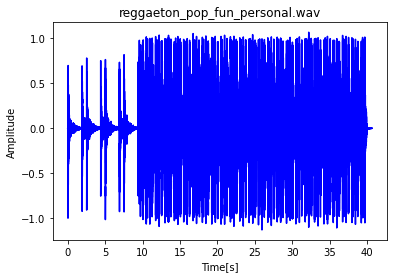

In [9]:
file_no = 150
sample_rate = 16000 # 왜 꼭 16000으로 할까 사람들은...
draw_amplitude(wav_list[file_no], sample_rate)

(128, 1272) [[-62.061226 -59.897877 -66.5415   ... -80.       -80.       -80.      ]
 [-55.92914  -52.795418 -56.94947  ... -80.       -77.37456  -80.      ]
 [-59.263535 -53.441387 -55.24907  ... -80.       -76.23523  -78.820786]
 ...
 [-41.854813 -40.443054 -48.080532 ... -80.       -80.       -80.      ]
 [-58.02042  -56.781548 -64.55202  ... -80.       -80.       -80.      ]
 [-61.416103 -60.149986 -67.969154 ... -80.       -80.       -80.      ]]


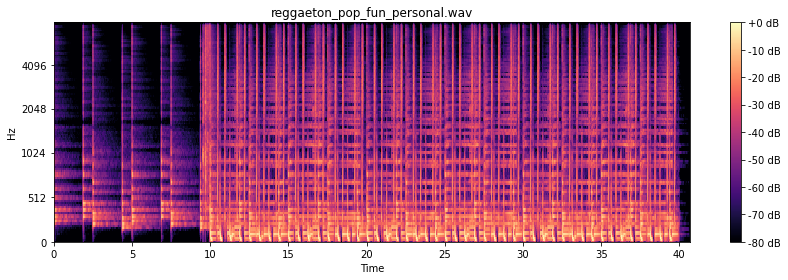

In [10]:
# melspectrogram 스펙트럼 그리기
path = wav_list[file_no]
(file_dir, file_id) = os.path.split(path)
y = librosa.load(path,sample_rate)[0]
S = librosa.feature.melspectrogram(y, sr=sample_rate, n_mels=128)
S_db = librosa.power_to_db(S, ref=np.max)
print(S_db.shape, S_db)

fig, ax = plt.subplots(figsize=(12, 4))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='mel', sr=sample_rate,
                        fmax=8000, ax=ax)
plt.title(file_id)
plt.colorbar(img, ax=ax, format='%+2.0f dB')
plt.tight_layout()

(1025, 1272) [[-80.       -77.250565 -80.       ... -80.       -80.       -80.      ]
 [-73.70534  -71.43855  -74.29705  ... -80.       -80.       -80.      ]
 [-70.192856 -67.366104 -72.58342  ... -80.       -80.       -80.      ]
 ...
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]
 [-80.       -80.       -80.       ... -80.       -80.       -80.      ]]


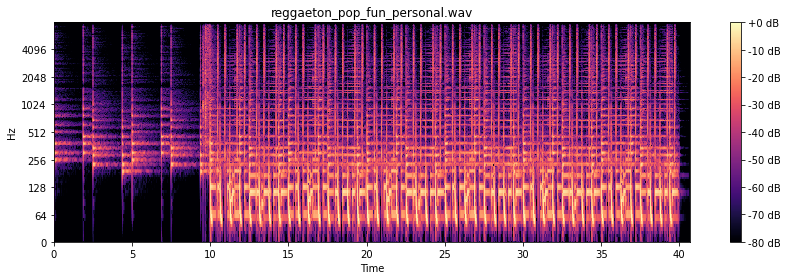

In [11]:
# stft -> amplitude 스펙트럼 그리기
# 참고: https://librosa.org/doc/latest/generated/librosa.stft.html
path = wav_list[file_no]
(file_dir, file_id) = os.path.split(path)
y = librosa.load(path,sample_rate)[0]
S = np.abs(librosa.stft(y))
S_db = librosa.amplitude_to_db(S, ref=np.max)
print(S_db.shape, S_db)

fig, ax = plt.subplots(figsize=(12, 4))
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', sr=sample_rate,
                        fmax=8000, ax=ax)
plt.title(file_id)
plt.colorbar(img, ax=ax, format='%+2.0f dB')
plt.tight_layout()

mfcc shape:(20, 1272), [[-4.3932651e+02 -4.1231238e+02 -4.7964203e+02 ... -8.9328552e+02
  -8.9671185e+02 -9.0360858e+02]
 [ 4.8183784e+01  5.8506138e+01  7.6736038e+01 ...  1.3004770e+01
   1.0587627e+01  2.0890222e+00]
 [ 5.8198190e+00  6.6923370e+00  1.0017929e+01 ...  6.1854076e+00
   8.1469173e+00  2.0432317e+00]
 ...
 [-3.2642741e+00 -2.9662475e-01  1.7753595e+00 ... -4.9385247e+00
  -3.3524733e+00 -5.9915602e-01]
 [-4.8927846e+00 -2.2733037e+00  1.4499295e-01 ... -3.5241933e+00
  -4.4157844e+00 -7.5163704e-01]
 [-2.8859465e+00 -6.7246127e-01  2.5056505e+00 ... -3.8205783e+00
  -4.8347859e+00 -8.8495970e-01]]
delta_mfcc shape:(20, 1272), [[10.890087   10.890087   10.890087   ... -0.27647936 -0.27647936
  -0.27647936]
 [-4.0805826  -4.0805826  -4.0805826  ... -0.1659019  -0.1659019
  -0.1659019 ]
 [-1.5017506  -1.5017506  -1.5017506  ...  0.24559784  0.24559784
   0.24559784]
 ...
 [-0.49383536 -0.49383536 -0.49383536 ...  0.23293078  0.23293078
   0.23293078]
 [-0.8321489  -0.832

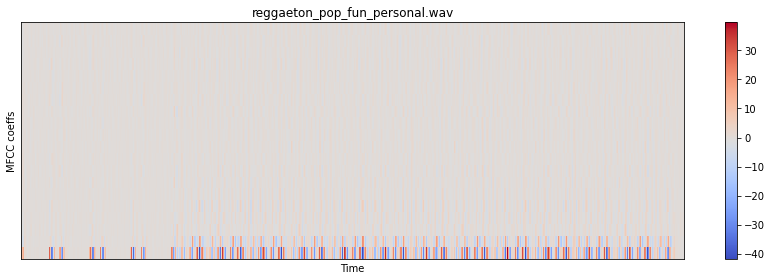

In [12]:
# melspectrogram -> mfcc
path = wav_list[file_no]
mfcc_plot(path, sample_rate)